# Multiple Linear Regression



### Week of November 14th, 2020
### Prepared by: Moe Fadae & Najem Bouazza

**In this session, we will learn the following points :** 
    - Data pre-processing: Missing Values
    - Plotting : Seaborn library
    - Impact of outliers : Simple Linear Regression as example
    - Practical Example of Multiple Linear Regression on house_price data - jupyter notebook
    - Practical Example of Multiple Linear Regression on house_price data - Spyder

## 1 - How do we handle Missing Values :

it is very common to find a lot of values missing in your data due to many factors not in your direct control. 

Sometimes due to the ways the data was captured: collecting data via surveys, some users don't fill the whole inputs. 

In some cases the values are not available at all for observation. 

Anyway, you will need to handle those missing values before you move further on your analysis

There are a few techniques which can help you deal with missing values in your dataset:
    
- **Drop missing values/columns/rows**
- **Imputation**

In [1]:
import pandas as pd
df = pd.read_csv("house_price_data.csv")

In [2]:
dataset = df.copy()

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Drop :

In [14]:
dataset["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [7]:
#dropna function in Pandas removes all the rows with missing values
dataset.dropna(inplace=True)

#Putting axis=1 removes the columns with missing values
dataset.dropna(inplace=True, axis=1)

#### Imputation : 

Replace or fill the missing data with some value.

There are lot of ways to impute the data.
 - A constant value that belongs to the set of possible values of that variable, such as 0, distinct from all other values
 - A mean, median or mode value for the column
 - A value estimated by another predictive model
 - Multiple Imputation


In [15]:
dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean(), inplace=True)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dataset.fillna() # hit shift+tab on the keyboard to learn more about fillna() method

#### Mmultiple imputation:

In [10]:
#### You might get errors running this cell
## you need to instant fancyimpute package, to do that, use the command line : easy_install fancyimpute
## MICE stands for : Multivariate Imputation by Chained Equations

from fancyimpute import IterativeImputer as MICE

dataset["LotFrontage"] = pd.DataFrame(MICE().fit_transform(dataset[["LotFrontage"]]))

# To apply this method to the whole dataframe, We need to select only the columns with numerical values, 
# it doesn't apply to the categorical values


Please visit this link to learn more about missing values imputation 

: https://scikit-learn.org/stable/modules/impute.html

## 2 - Plotting : Seaborn library

In [3]:
import seaborn as sns

In [5]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


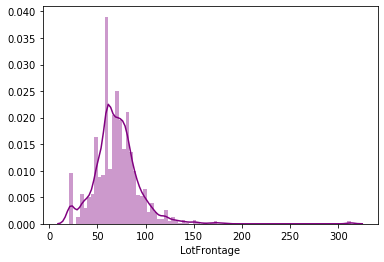

In [19]:
sns.distplot(dataset["LotFrontage"], kde = True, bins = 80, color = "purple")

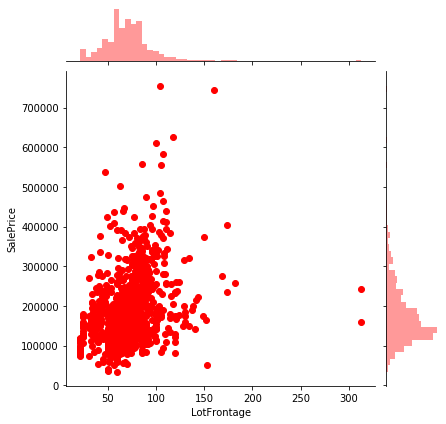

In [27]:
# we can use kind as  Kind = reg to plot the regression line

sns.jointplot(x = "LotFrontage" , y = "SalePrice" , data = dataset, kind = "scatter", color = "red")

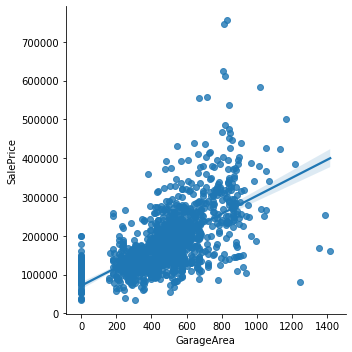

In [131]:
# another way to use regression plot is (scatter plot with a linear fit on top of it):

sns.lmplot(x= "GarageArea", y = "SalePrice", data = dataset)

In [39]:
#sns.pairplot(dataset)

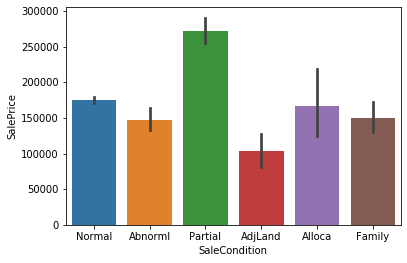

In [29]:
sns.barplot(x = "SaleCondition" , y ="SalePrice" , data = dataset)

In [31]:
import numpy as np

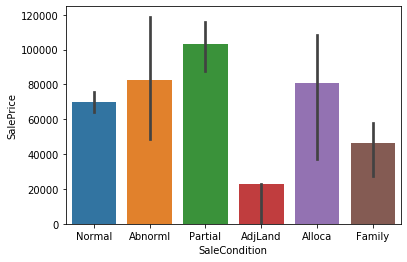

In [32]:
sns.barplot(x = "SaleCondition" , y ="SalePrice" , data = dataset, estimator = np.std)

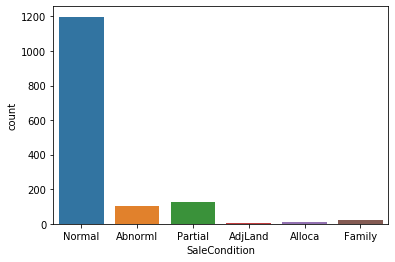

In [33]:
sns.countplot(x = "SaleCondition", data = dataset)

In [34]:
#dataset.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


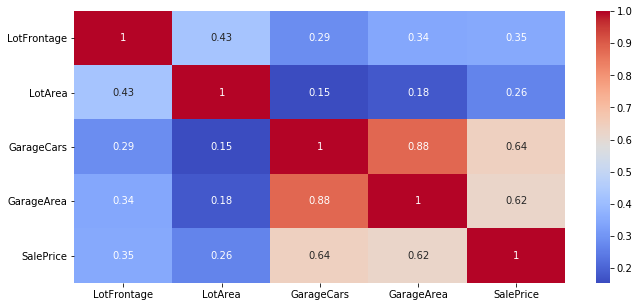

In [189]:
plt.figure(figsize = (11,5))
sns.heatmap(dataset.corr(), annot = True, cmap = "coolwarm")

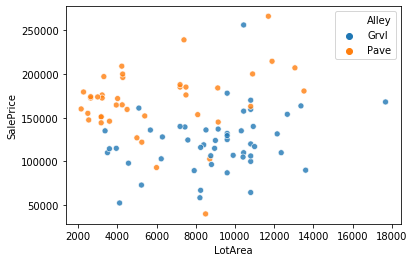

In [7]:
# Plot
sns.scatterplot(data=dataset, x='LotArea', y='SalePrice', hue = "Alley", alpha=0.8)


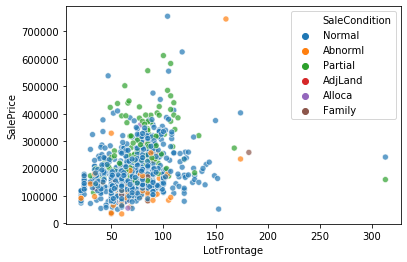

In [33]:
# Plot
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice',alpha=0.7, hue='SaleCondition');

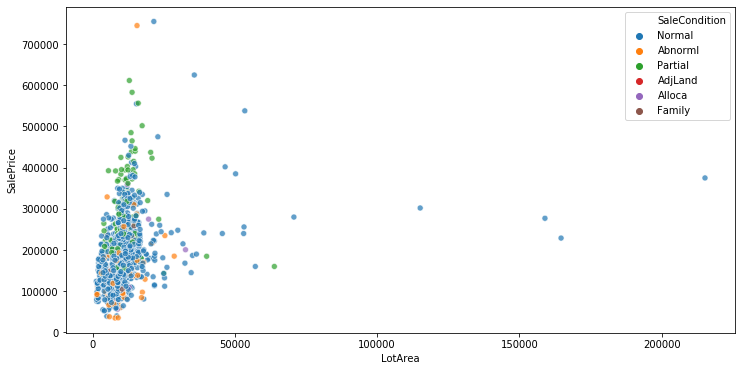

In [40]:
#If we want to resize the figure , this is how we do it:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='LotArea', y='SalePrice',alpha=0.7, hue='SaleCondition');


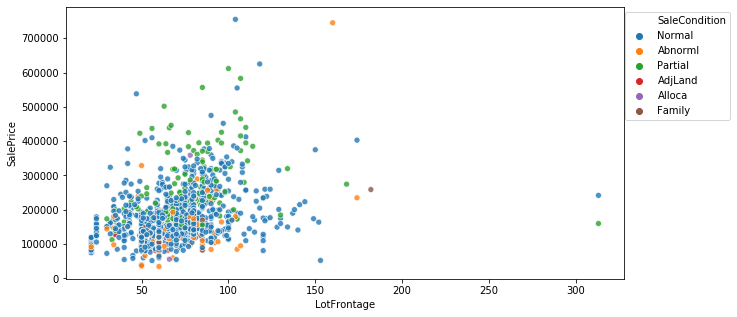

In [43]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=df, x='LotFrontage', y='SalePrice',alpha=0.8, hue='SaleCondition');

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));

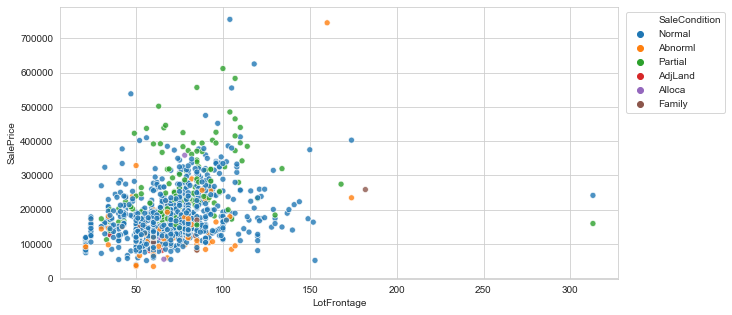

In [48]:
# To Change default style
sns.set_style('whitegrid')


plt.figure(figsize=(10, 5))

sns.scatterplot(data=df, x='LotFrontage', y='SalePrice',alpha=0.8, hue='SaleCondition');

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));

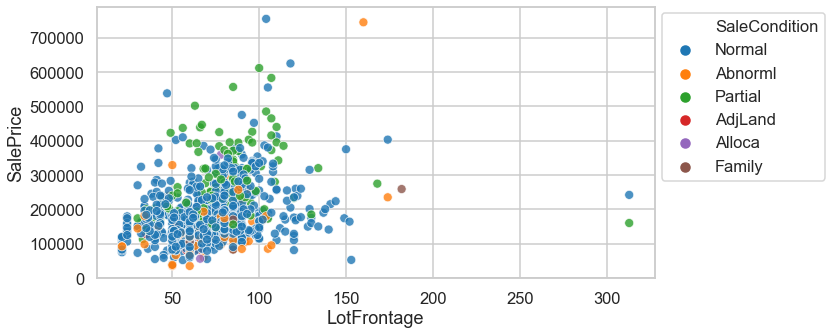

In [56]:
#Change default context
sns.set_context('talk')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice',alpha=0.8, hue='SaleCondition');
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1.007));


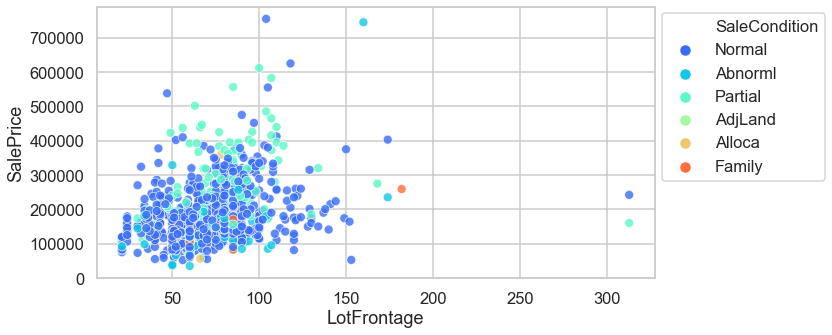

In [57]:
# Change default palette
sns.set_palette('rainbow')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice',alpha=0.8, hue='SaleCondition');
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1.007));

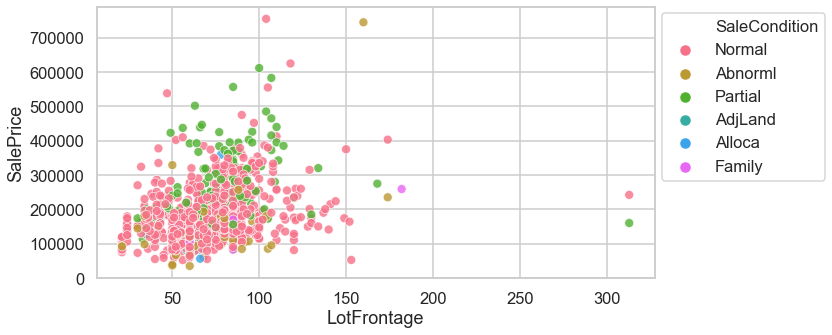

In [58]:
# Change default palette
sns.set_palette(['green', 'purple', 'red'])

# or by using colors codes : 
# sns.set_palette(['#62C370', '#FFD166', '#EF476F'])

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice',alpha=0.8, hue='SaleCondition');
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1.007));

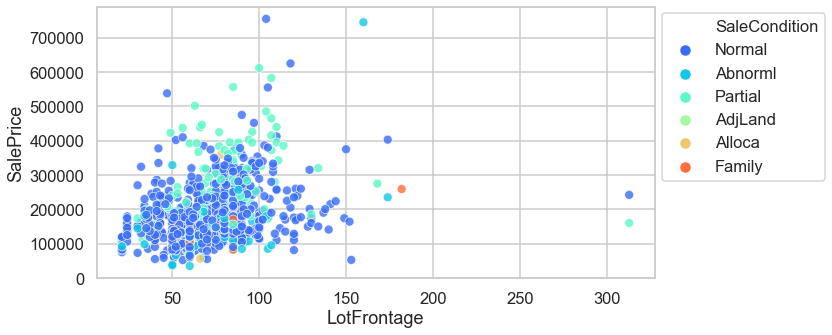

In [59]:
# Or we can do all above as following :

# Change defaults
sns.set(style='whitegrid', context='talk', palette='rainbow')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice',alpha=0.8, hue='SaleCondition');
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1.007));


## 3 - Impact of outliers : Simple Linear Regression as example

**We will see this example at the end of this tutorial: Simple Linear Regression on GarageArea and SalePrice**

## 4 - Practical Example of Multiple Linear Regression on house_price data - Jupypter notebook

Introduction :
Linear Regression can be classified into 2 categories:
    
   **- Simple Linear Regression:** when there is a single input variable for the output variable
        
   **- Multiple Linear Regression:** when there are 2 or more features.



#### STEP 1 : Libraries

In [5]:
import numpy as np  # library for scientific computing
import pandas as pd # data structures and data analysis package
import matplotlib.pyplot as plt # 2D plotting library

#### STEP 2 : Dataset - Import, Visualize and Process

In [160]:
df = pd.read_csv('house_price_data.csv')
dataset = df.copy() # We take a copy of our raw data, In order to avoid any loss of data (in case we do a modification
                    # and we try to cancel and go back)

In [161]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [162]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [163]:
dataset = dataset[["LotFrontage","LotArea","GarageCars","GarageArea","SalePrice"]]

In [164]:
dataset

,LotFrontage,LotArea,GarageCars,GarageArea,SalePrice
0,65.0,8450,2,548,208500
1,80.0,9600,2,460,181500
2,68.0,11250,2,608,223500
3,60.0,9550,3,642,140000
4,84.0,14260,3,836,250000
...,...,...,...,...,...
1455,62.0,7917,2,460,175000
1456,85.0,13175,2,500,210000
1457,66.0,9042,1,252,266500
1458,68.0,9717,1,240,142125


In [84]:
dataset.isnull().values.any()

True

In [85]:
dataset.isnull().sum()

LotFrontage    259
LotArea          0
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [86]:
dataset.fillna(value=dataset["LotFrontage"].mean(), inplace = True)
# impute the NaN with the column's mean
# If you don't force inplace to True, the modification won't take place

In [87]:
dataset.isnull().sum()

LotFrontage    0
LotArea        0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [88]:
dataset.head(5)

,LotFrontage,LotArea,GarageCars,GarageArea,SalePrice
0,65.0,8450,2,548,208500
1,80.0,9600,2,460,181500
2,68.0,11250,2,608,223500
3,60.0,9550,3,642,140000
4,84.0,14260,3,836,250000


In [89]:
dataset.describe() # Shows the statistics of the dataset

,LotFrontage,LotArea,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1.767123,472.980137,180921.195890
std,22.024023,9981.264932,0.747315,213.804841,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,1.000000,334.500000,129975.000000
50%,70.049958,9478.500000,2.000000,480.000000,163000.000000
75%,79.000000,11601.500000,2.000000,576.000000,214000.000000
max,313.000000,215245.000000,4.000000,1418.000000,755000.000000


In [90]:
#Checking the shape of our dataset
dataset.shape

(1460, 5)

In [91]:
dataset.columns

Index(['LotFrontage', 'LotArea', 'GarageCars', 'GarageArea', 'SalePrice'], dtype='object')

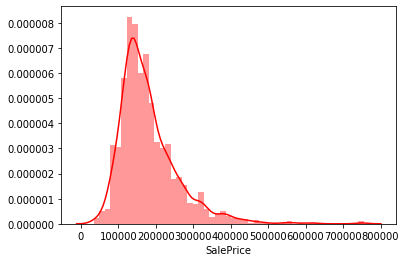

In [127]:
sns.distplot(dataset["SalePrice"], color = "red")

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


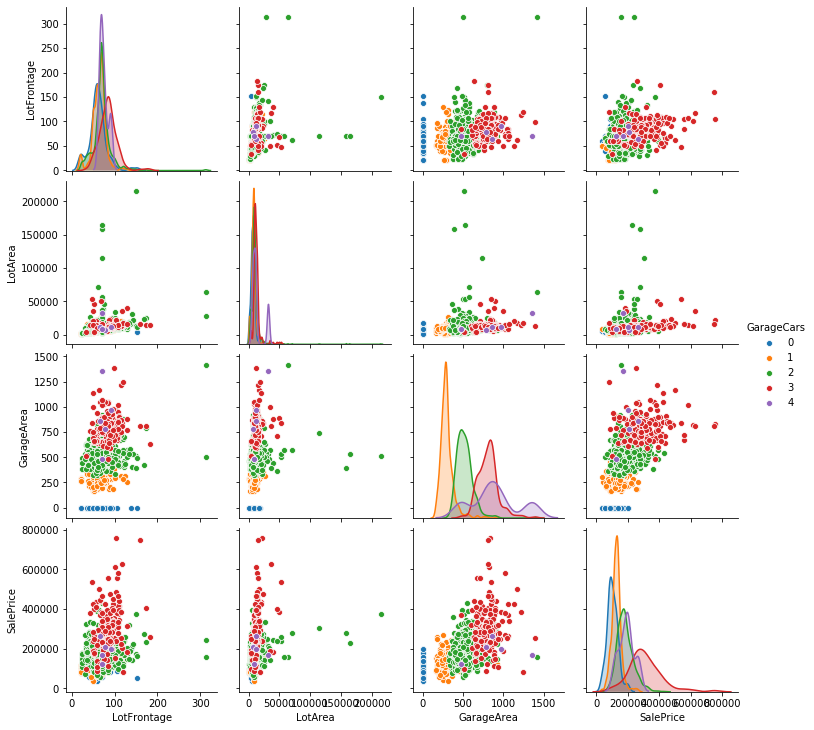

In [126]:
sns.pairplot(dataset, hue = "GarageCars")

In [92]:
# Define X and y.
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [93]:
dataset.corr()

,LotFrontage,LotArea,GarageCars,GarageArea,SalePrice
LotFrontage,1.000000,0.306795,0.269729,0.323663,0.334901
LotArea,0.306795,1.000000,0.154871,0.180403,0.263843
GarageCars,0.269729,0.154871,1.000000,0.882475,0.640409
GarageArea,0.323663,0.180403,0.882475,1.000000,0.623431
SalePrice,0.334901,0.263843,0.640409,0.623431,1.000000


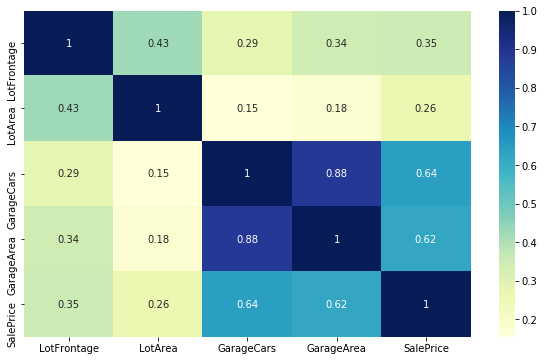

In [193]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(), annot=True, cmap = "YlGnBu")

**Scale / Standardize the features:**

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### STEP 3 : Training set and Test set

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### STEP 4 : Create and Train the Model

In [97]:
from sklearn.linear_model import LinearRegression

#Create the model :
regressor = LinearRegression()

#Train the model :
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Trainig the model: model has to find the most optimal coefficients for all the features.

In [98]:
L = regressor.coef_
L

array([ 9460.22036732,  9311.4149111 , 31943.47298982, 19110.63841026])

In [99]:
coeff_X = pd.DataFrame(regressor.coef_, index = dataset.columns[:-1], columns=['Coefficient'])
coeff_X

,Coefficient
LotFrontage,9460.220367
LotArea,9311.414911
GarageCars,31943.472990
GarageArea,19110.638410


In [100]:
regressor.intercept_

180652.846374314

In [106]:
print("Price = {:.2f} + {:.2f}*LotFrontage + {:.2f}*LotArea + {:.2f}*GarageCars + {:.2f}*GarageArea ".
      format(regressor.intercept_,L[0], L[1], L[2] ,L[3]))

Price = 180652.85 + 9460.22*LotFrontage + 9311.41*LotArea + 31943.47*GarageCars + 19110.64*GarageArea 


#### STEP 5 : Evaluate the Model - Predict X_test

In [107]:
y_pred = regressor.predict(X_test)

To check the difference between the **predicted value - y_pred** and **actual value - y_test**

In [110]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results.head(20)

,Actual,Predicted
0,200624,212267.417292
1,133000,129907.198531
2,110000,133766.168706
3,192000,198560.281273
4,88000,99842.864054
5,85000,123182.642602
6,282922,253874.264233
7,141000,144170.882931
8,745000,307187.575065
9,148800,186187.723287


In [121]:
# Root Mean Squared Error:

from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error:
root_mse = np.sqrt(mse)

#R_squared : 
R_squared = r2_score(y_test, y_pred)

print("Intercept:              ", regressor.intercept_)
print("Root Mean Square Error: ", root_mse)
print("R^2 Value in %:              ", R_squared*100)

Intercept:               180652.846374314
Root Mean Square Error:  66317.21692703411
R^2 Value in %:               36.31525034758156


#### STEP 6 : How to improve the Model ?

- Using more training data,

- choosing more appropriate features which have high correlation to the output.

## 3 - Impact of outliers : Simple Linear Regression on GarageArea and SalePrice as example

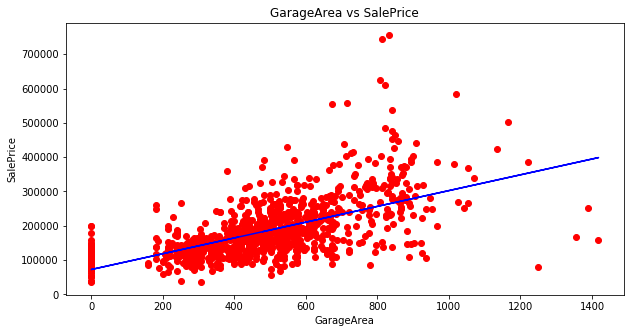

R_squared in % is:  38.86


In [181]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset : Define X and y
# dataset = pd.read_csv('house_price_data.csv') # already imported above

X_s = dataset["GarageArea"].values # .values convert dataframe into numpy array
y_s = dataset["SalePrice"].values # dataset.to_numpy()

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.2)

# Training the Simple Linear Regression model on the whole dataset
# import linear_model from sklearn
from sklearn.linear_model import LinearRegression

simple_regressor = LinearRegression() # created our model
simple_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) # Train the model

# Predicting the Test set results
simple_y_pred = simple_regressor.predict(X_test.reshape(-1,1))

# Visualising the Training set results

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, simple_regressor.predict(X_train.reshape(-1,1)), color = 'blue')
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

# R-squared
r_squared = simple_regressor.score(X_s.reshape(-1,1), y_s.reshape(-1,1))
print ("R_squared in % is: ", "{:.2f}".format(r_squared*100))


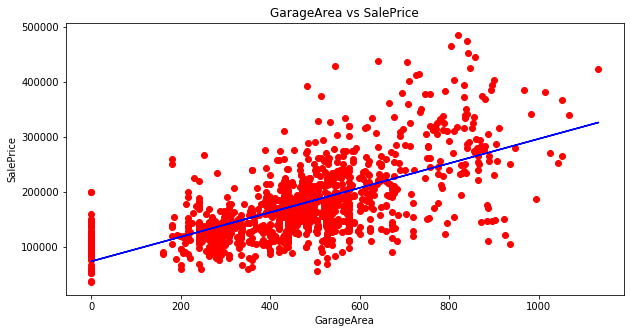

R_squared in % is:  42.14


In [180]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset : Define X and y
# dataset = pd.read_csv('house_price_data.csv') # already imported above


# This line removes the outliers: 
dataset2 = dataset[(dataset["SalePrice"]<500000)& (dataset["GarageArea"]<1200)]

#Define X and y
X_s = dataset2["GarageArea"].values # .values convert dataframe into numpy array
y_s = dataset2["SalePrice"].values # dataset.to_numpy()

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.2)

# Training the Simple Linear Regression model on the whole dataset
# import linear_model from sklearn
from sklearn.linear_model import LinearRegression

simple_regressor = LinearRegression() # created our model
simple_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) # Train the model

# Predicting the Test set results
simple_y_pred = simple_regressor.predict(X_test.reshape(-1,1))

# Visualising the Training set results
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, simple_regressor.predict(X_train.reshape(-1,1)), color = 'blue')
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

# R-squared
r_squared = simple_regressor.score(X_s.reshape(-1,1), y_s.reshape(-1,1))
print ("R_squared in % is: ", "{:.2f}".format(r_squared*100))

## 5 - Practical Example of Multiple Linear Regression on house_price data - Spyder

**See you in spyder application!**